### SiC MOSFET - C2M0280120D
#### Ouliers Analysis and Removal using KDE and Box plots Visualisation 

- KDE plots
- Boxplots
- IQR-based outlier counts per column
(Optional exploring -Apply KMeans clustering, PCA)

*And final plotting and Detailed Summary Analysis of IQR-based outlier counts per column*

Loaded: mosfets_step2_no_zeros/C2M0280120D_no_zeros.csv with 429245 rows

KDE plots:


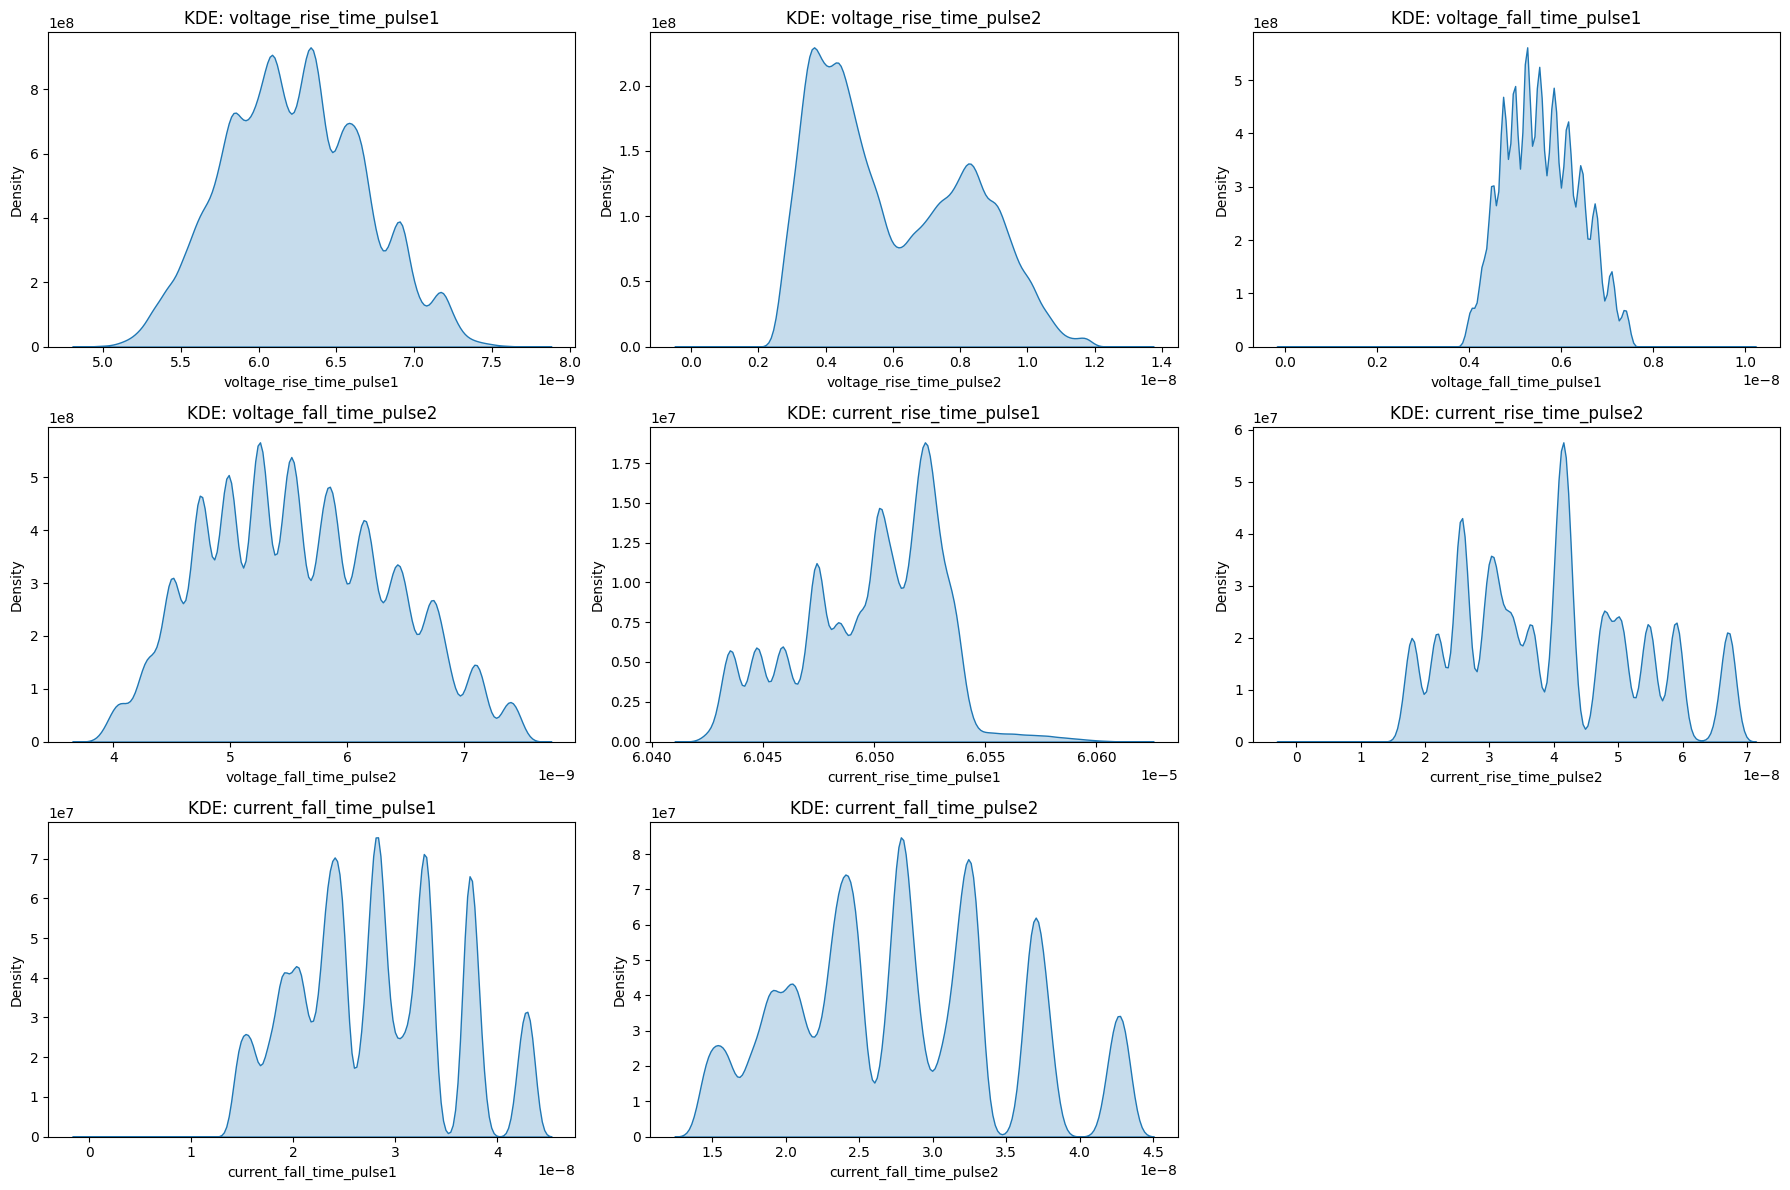

Boxplots:


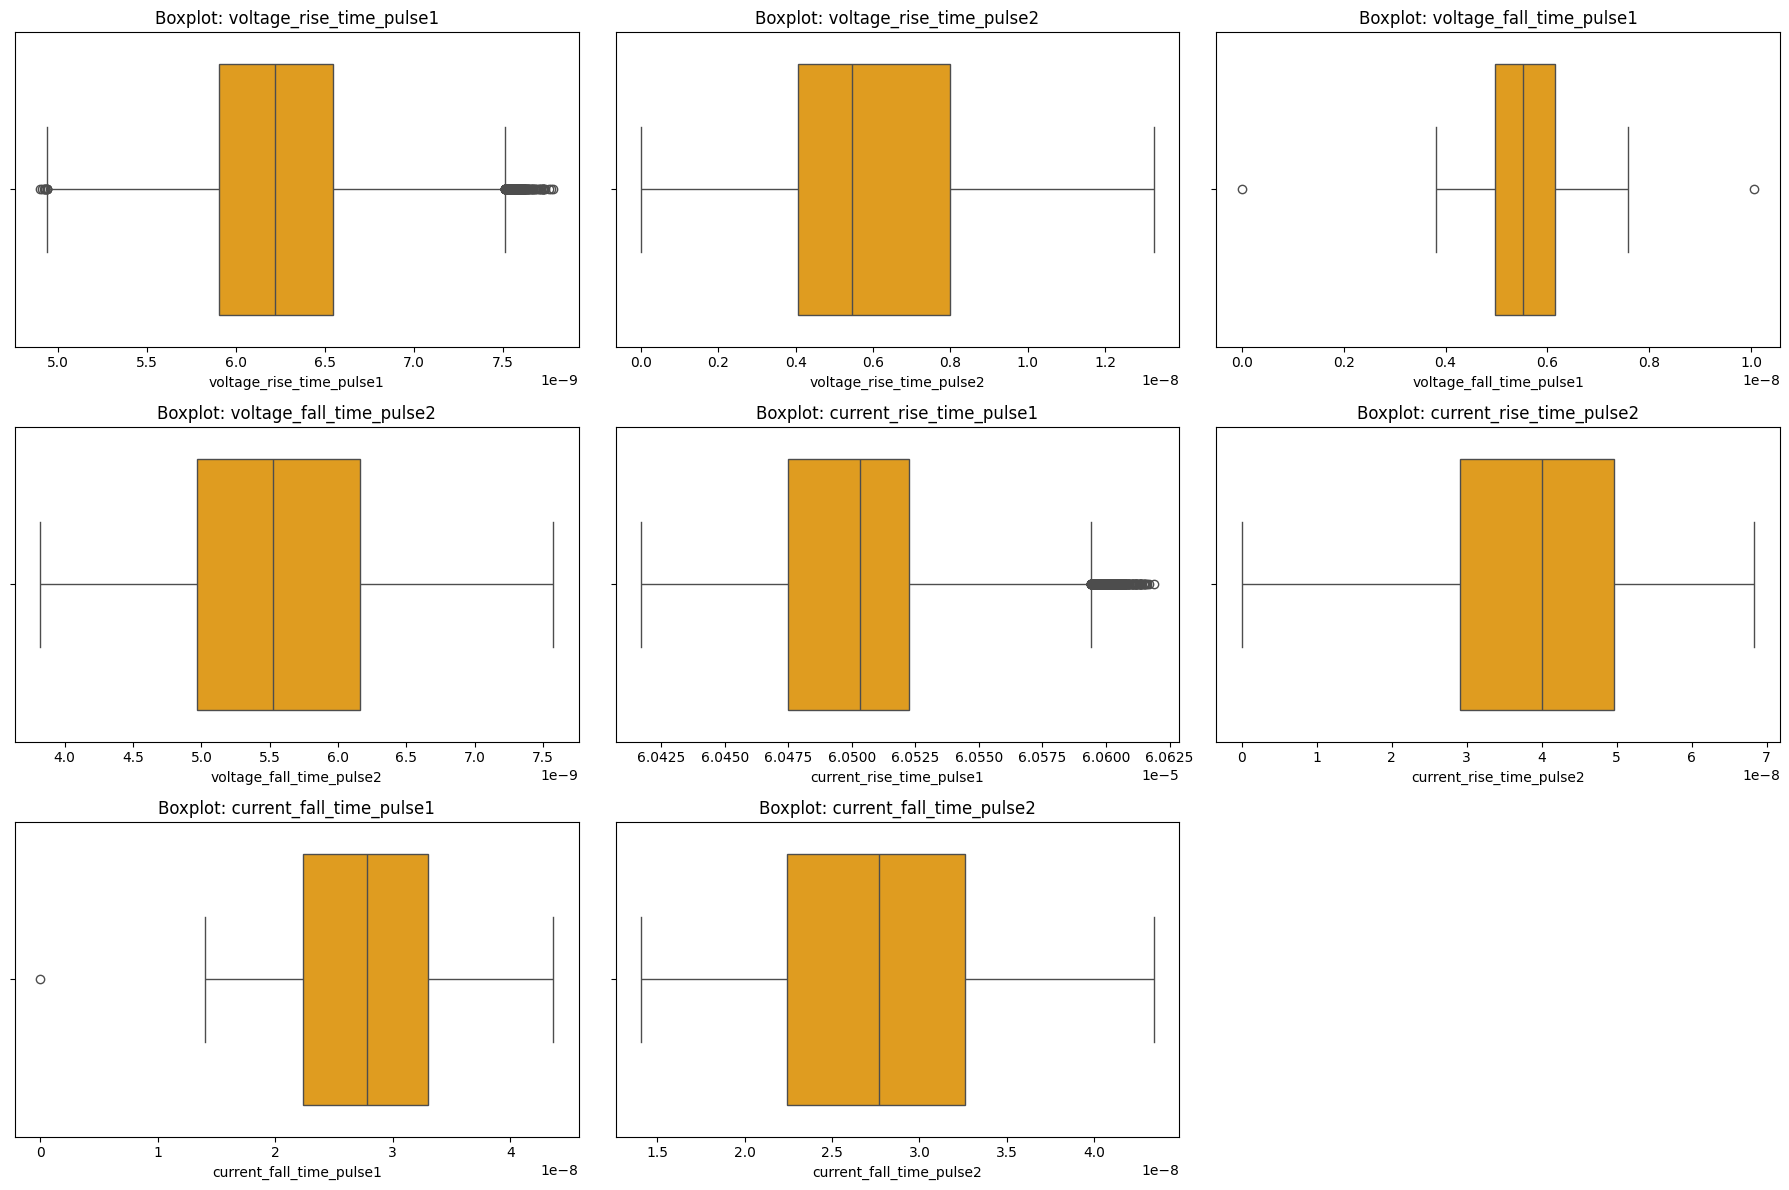

,count,mean,std,min,25%,50%,75%,max,range
voltage_rise_time_pulse1,429245.0,6.200000e-09,4.000000e-10,4.900000e-09,5.900000e-09,6.200000e-09,6.500000e-09,7.800000e-09,2.900000e-09
voltage_rise_time_pulse2,429245.0,6.000000e-09,2.200000e-09,0.000000e+00,4.100000e-09,5.400000e-09,8.000000e-09,1.330000e-08,1.330000e-08
voltage_fall_time_pulse1,429245.0,5.600000e-09,8.000000e-10,0.000000e+00,5.000000e-09,5.500000e-09,6.200000e-09,1.010000e-08,1.010000e-08
voltage_fall_time_pulse2,429245.0,5.600000e-09,8.000000e-10,3.800000e-09,5.000000e-09,5.500000e-09,6.200000e-09,7.600000e-09,3.700000e-09
current_rise_time_pulse1,429245.0,6.049780e-05,3.140000e-08,6.041710e-05,6.047480e-05,6.050310e-05,6.052250e-05,6.061880e-05,2.017000e-07
current_rise_time_pulse2,429245.0,3.940000e-08,1.350000e-08,0.000000e+00,2.910000e-08,4.000000e-08,4.960000e-08,6.840000e-08,6.840000e-08
current_fall_time_pulse1,429245.0,2.780000e-08,7.400000e-09,0.000000e+00,2.230000e-08,2.780000e-08,3.300000e-08,4.360000e-08,4.360000e-08
current_fall_time_pulse2,429245.0,2.770000e-08,7.300000e-09,1.410000e-08,2.240000e-08,2.770000e-08,3.260000e-08,4.340000e-08,2.930000e-08


IQR-based outlier counts per column:

voltage_rise_time_pulse1: 208 outliers
voltage_rise_time_pulse2: 0 outliers
voltage_fall_time_pulse1: 2 outliers
voltage_fall_time_pulse2: 0 outliers
current_rise_time_pulse1: 496 outliers
current_rise_time_pulse2: 0 outliers
current_fall_time_pulse1: 1 outliers
current_fall_time_pulse2: 0 outliers


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset of the mosfet C2M0025120D to remove the outliers 
FILE_PATH = "mosfets_step2_no_zeros/C2M0280120D_no_zeros.csv"  # Replace with other MOSFET file
df = pd.read_csv(FILE_PATH)

# The time columns from the output or target 
time_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2'
]
# Just a quick display to check the right file and the rows 
print(f"Loaded: {FILE_PATH} with {len(df)} rows\n")
# KDE plotting for understanding the distribution and outliers
print("KDE plots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Box Plots for the ouliers
print("Boxplots:")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(time_columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")
for j in range(len(time_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Adding the range and min and max to check 
describe_df = df[time_columns].describe().T
describe_df["range"] = describe_df["max"] - describe_df["min"]
display(describe_df.round(10))

# VERY IMPOTANT FOR UNDERSTANDING THE DISTRIBUTION
print("IQR-based outlier counts per column:\n")
for col in time_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


In [2]:
# Removing the 1 and 2 outliers from the columns 
columns_with_outliers = [
    'voltage_rise_time_pulse1', 'voltage_fall_time_pulse1',
    'current_rise_time_pulse1', 'current_fall_time_pulse1'
]
print("\nRemoving IQR-based outliers from selected columns...")
outlier_indices = set()
for col in columns_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    col_outliers = df[(df[col] < lower) | (df[col] > upper)].index
    outlier_indices.update(col_outliers)

print(f"Total unique outlier rows to remove: {len(outlier_indices)}")
df_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)
print(f"Cleaned DataFrame shape: {df_cleaned.shape} (Removed {len(outlier_indices)} rows)")


Removing IQR-based outliers from selected columns...
Total unique outlier rows to remove: 705
Cleaned DataFrame shape: (428540, 50) (Removed 705 rows)


In [3]:
print("IQR-based outlier counts per column:\n")
for col in time_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

IQR-based outlier counts per column:

voltage_rise_time_pulse1: 3 outliers
voltage_rise_time_pulse2: 0 outliers
voltage_fall_time_pulse1: 0 outliers
voltage_fall_time_pulse2: 0 outliers
current_rise_time_pulse1: 1 outliers
current_rise_time_pulse2: 0 outliers
current_fall_time_pulse1: 0 outliers
current_fall_time_pulse2: 0 outliers


In [4]:
# Again removing the outliers from the columns
columns_with_outliers = [
    'voltage_rise_time_pulse1', 'voltage_fall_time_pulse1',
    'current_rise_time_pulse1', 'current_fall_time_pulse1'
]
print("\nIteratively removing all IQR-based outliers from selected columns...")
def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].index
total_removed = 0
while True:
    outlier_indices = set()
    for col in columns_with_outliers:
        outlier_indices.update(count_outliers(df, col))

    if not outlier_indices:
        break 

    df = df.drop(index=outlier_indices)
    df = df.reset_index(drop=True)
    total_removed += len(outlier_indices)
print(f"All outliers removed from selected columns. Total rows removed: {total_removed}")
print(f"Cleaned DataFrame shape: {df.shape}")


Iteratively removing all IQR-based outliers from selected columns...
All outliers removed from selected columns. Total rows removed: 709
Cleaned DataFrame shape: (428536, 50)


In [5]:
print("IQR-based outlier counts per column:\n")
for col in time_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

IQR-based outlier counts per column:

voltage_rise_time_pulse1: 0 outliers
voltage_rise_time_pulse2: 0 outliers
voltage_fall_time_pulse1: 0 outliers
voltage_fall_time_pulse2: 0 outliers
current_rise_time_pulse1: 0 outliers
current_rise_time_pulse2: 0 outliers
current_fall_time_pulse1: 0 outliers
current_fall_time_pulse2: 0 outliers


In [6]:
df_cleaned = df.copy()

KDE plots for EMI columns:


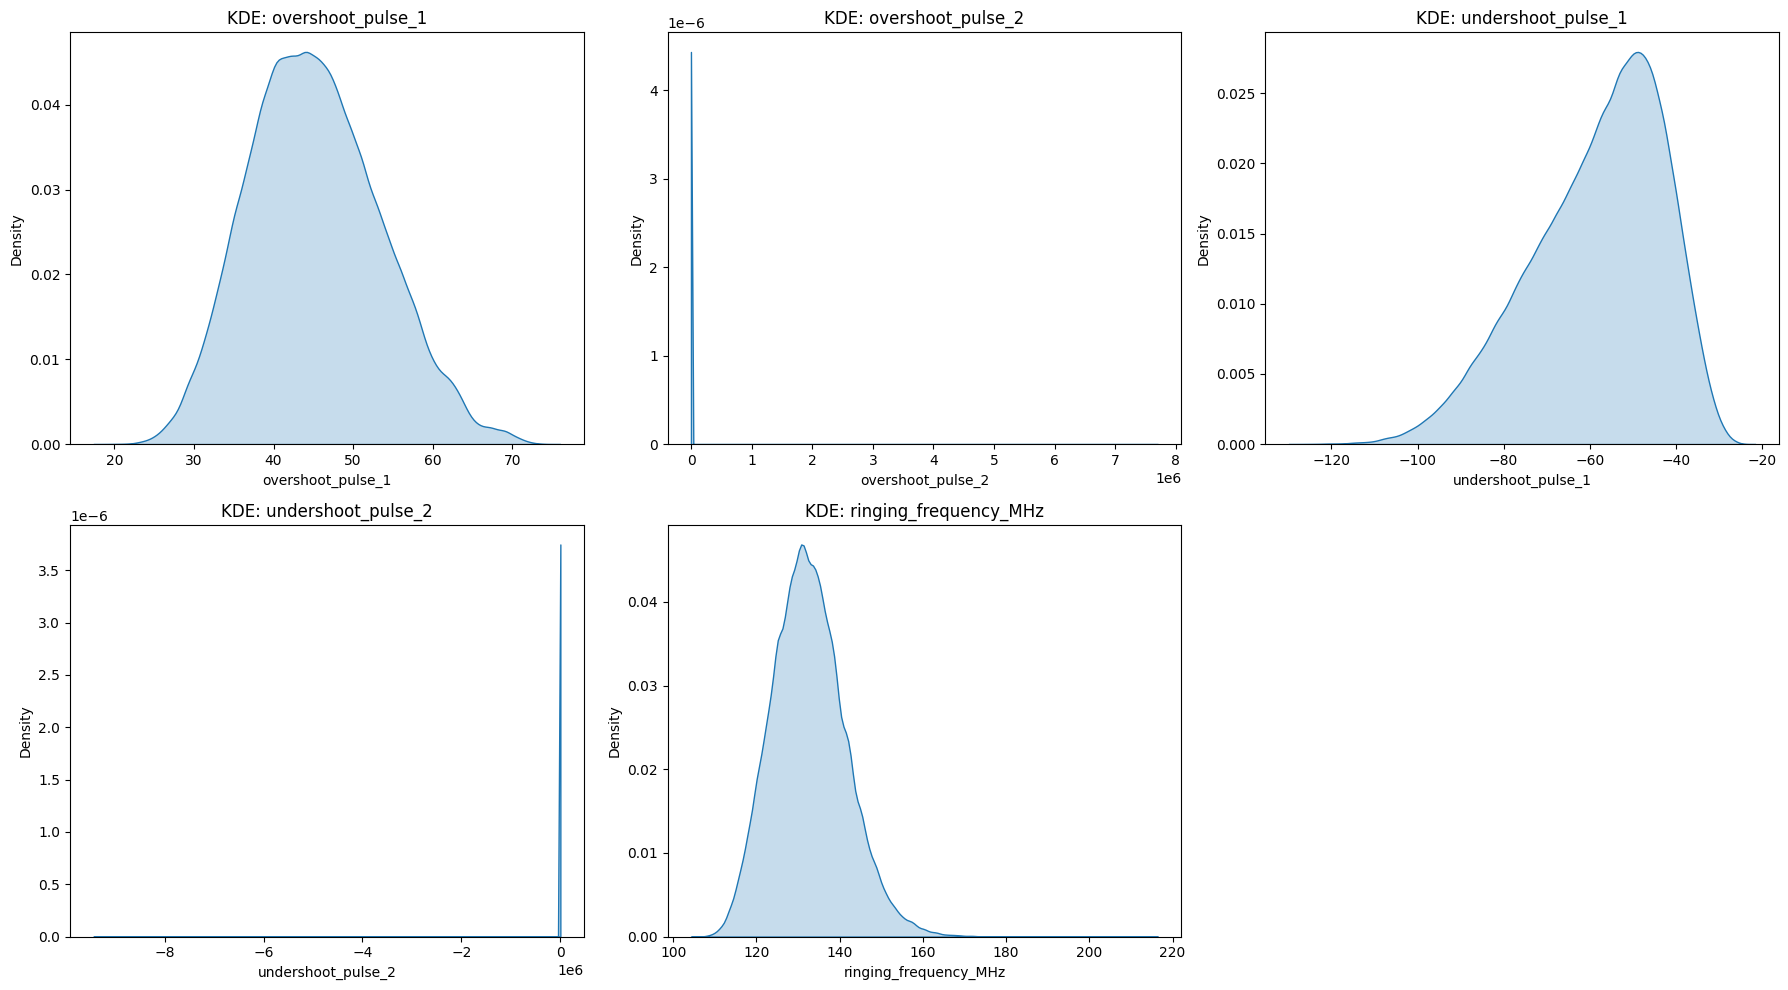

Boxplots for EMI columns:


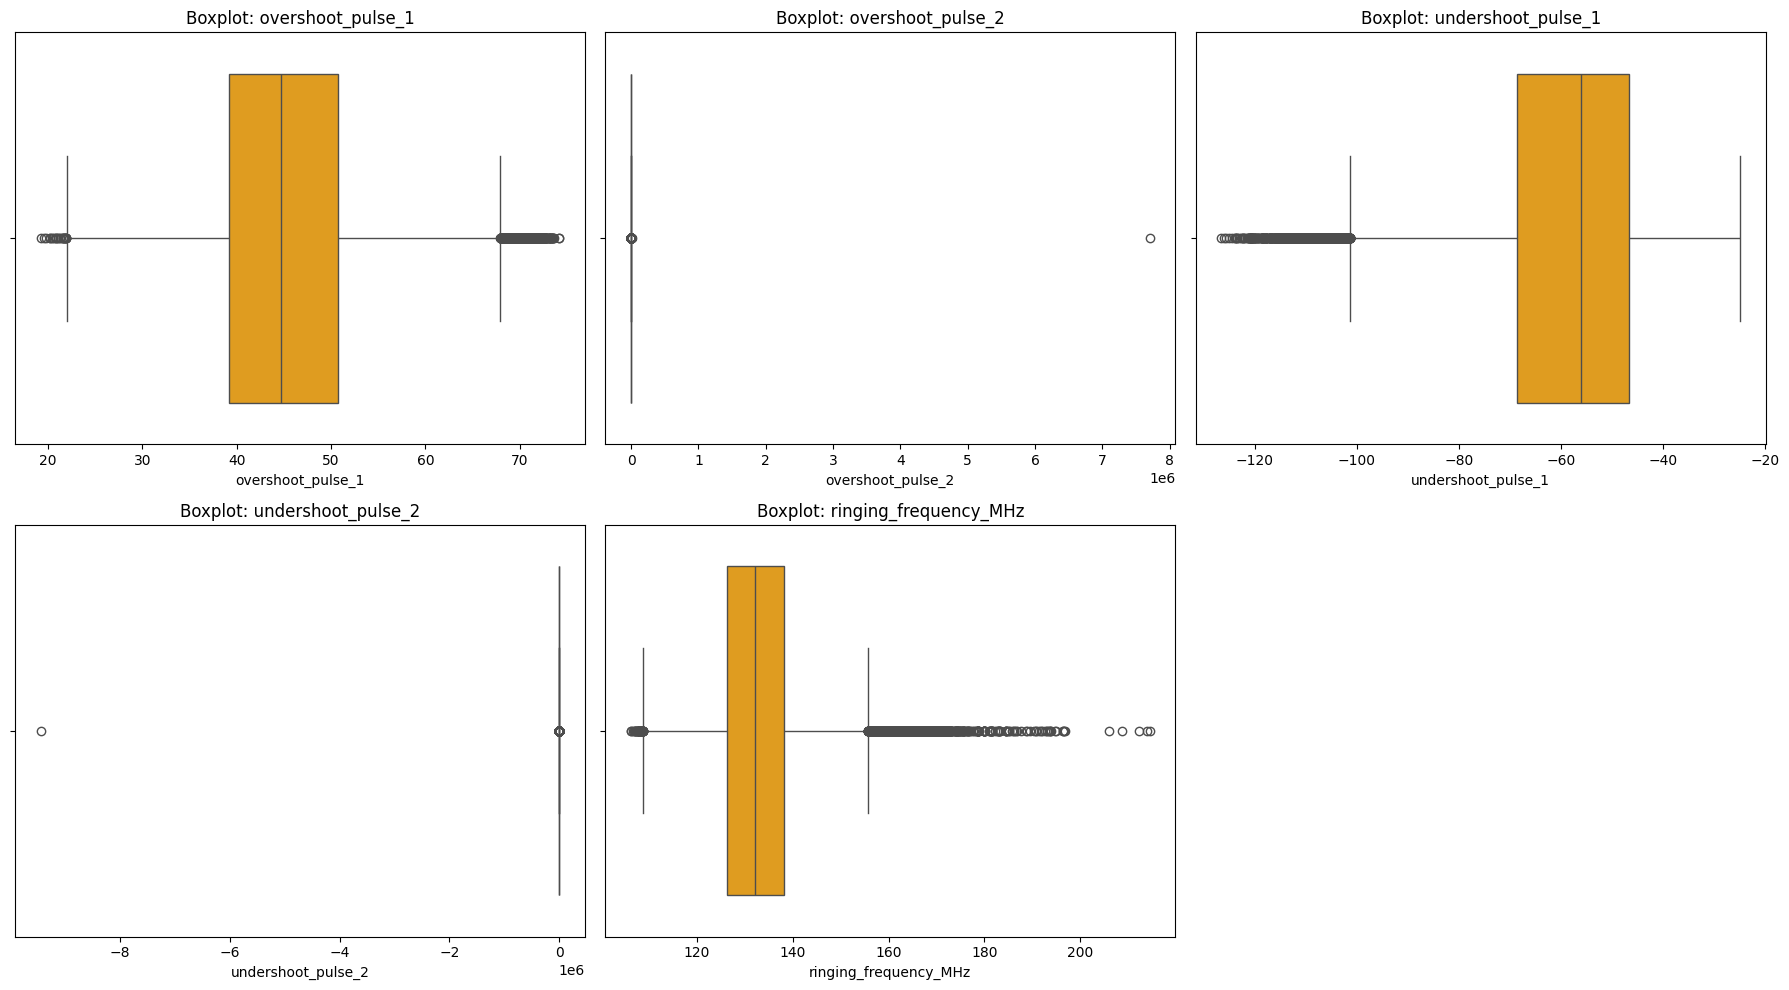

,count,mean,std,min,25%,50%,75%,max,range
overshoot_pulse_1,428536.0,45.1653,8.2395,1.922500e+01,39.1962,44.6884,50.6959,7.416970e+01,5.494470e+01
overshoot_pulse_2,428536.0,25.9970,11764.5245,-2.982390e+01,-9.1970,5.1186,23.5767,7.701361e+06,7.701391e+06
undershoot_pulse_1,428536.0,-58.4671,15.3756,-1.265053e+02,-68.5721,-56.0140,-46.7159,-2.497100e+01,1.015343e+02
undershoot_pulse_2,428536.0,-80.6690,14421.4923,-9.440739e+06,-68.7491,-56.1477,-46.8332,-2.505200e+01,9.440714e+06
ringing_frequency_MHz,428536.0,132.5524,8.8713,1.062406e+02,126.3515,132.0724,138.1212,2.144899e+02,1.082493e+02


IQR-based outlier counts for EMI columns:

overshoot_pulse_1: 2010 outliers
overshoot_pulse_2: 287 outliers
undershoot_pulse_1: 2522 outliers
undershoot_pulse_2: 2542 outliers
ringing_frequency_MHz: 4595 outliers


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# EMI columsn 
emi_cols = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

print("KDE plots for EMI columns:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(emi_cols):
    sns.kdeplot(df_cleaned[col], ax=axes[i], fill=True)
    axes[i].set_title(f"KDE: {col}")

for j in range(len(emi_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

print("Boxplots for EMI columns:")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(emi_cols):
    sns.boxplot(x=df_cleaned[col], ax=axes[i], color='orange')
    axes[i].set_title(f"Boxplot: {col}")

for j in range(len(emi_cols), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

describe_emi = df_cleaned[emi_cols].describe().T
describe_emi["range"] = describe_emi["max"] - describe_emi["min"]
display(describe_emi.round(4))
print("IQR-based outlier counts for EMI columns:\n")
for col in emi_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

In [8]:
emi_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]
def remove_iqr_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
    return df_cleaned
df_cleaned = remove_iqr_outliers(df, emi_columns)
print("Cleaned dataset shape:", df_cleaned.shape)
print("\n Describe after outlier removal:\n")
print(df_cleaned[emi_columns].describe())


Cleaned dataset shape: (418763, 50)

 Describe after outlier removal:

       overshoot_pulse_1  overshoot_pulse_2  undershoot_pulse_1  \
count      418763.000000      418763.000000       418763.000000   
mean           45.080931           8.223818          -58.133156   
std             8.057997          20.727199           14.949874   
min            22.021179         -29.823918         -101.460396   
25%            39.216553          -8.951324          -68.314892   
50%            44.682495           5.468018          -55.853416   
75%            50.612335          23.863647          -46.595747   
max            67.937866          72.920898          -24.970978   

       undershoot_pulse_2  ringing_frequency_MHz  
count       418763.000000          418763.000000  
mean           -58.275063             132.271786  
std             14.987593               8.423503  
min           -101.171951             108.648550  
25%            -68.485485             126.274488  
50%            -55.

In [9]:
print("Rechecking IQR-based outliers after cleaning:\n")

for col in emi_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Rechecking IQR-based outliers after cleaning:

overshoot_pulse_1: 173 outliers
overshoot_pulse_2: 0 outliers
undershoot_pulse_1: 105 outliers
undershoot_pulse_2: 10 outliers
ringing_frequency_MHz: 372 outliers


In [10]:

emi_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz'
]

df_final = df_cleaned.copy()

# Loop through each EMI column and filter out remaining IQR outliers
for col in emi_columns:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_final = df_final[(df_final[col] >= lower) & (df_final[col] <= upper)]

print(f"Final cleaned dataset shape: {df_final.shape}")


Final cleaned dataset shape: (418111, 50)


In [11]:
print("Rechecking IQR-based outliers after cleaning:\n")

for col in emi_columns:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_final[(df_final[col] < lower) | (df_final[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Rechecking IQR-based outliers after cleaning:

overshoot_pulse_1: 13 outliers
overshoot_pulse_2: 0 outliers
undershoot_pulse_1: 5 outliers
undershoot_pulse_2: 0 outliers
ringing_frequency_MHz: 37 outliers


In [12]:
#removing any remaining IQR outliers in any of the EMI columns
for col in emi_columns:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_final = df_final[(df_final[col] >= lower) & (df_final[col] <= upper)]

print(f"Fully cleaned dataset shape (no IQR outliers left in EMI columns): {df_final.shape}")


Fully cleaned dataset shape (no IQR outliers left in EMI columns): (418056, 50)


In [14]:

for col in emi_columns:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_final[(df_final[col] < lower) | (df_final[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


overshoot_pulse_1: 1 outliers
overshoot_pulse_2: 0 outliers
undershoot_pulse_1: 0 outliers
undershoot_pulse_2: 0 outliers
ringing_frequency_MHz: 6 outliers


In [15]:

for col in emi_columns:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_final = df_final[(df_final[col] >= lower) & (df_final[col] <= upper)]

print(f"FINAL dataset shape (after complete outlier removal): {df_final.shape}")


FINAL dataset shape (after complete outlier removal): (418049, 50)


In [16]:

for col in emi_columns:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_final[(df_final[col] < lower) | (df_final[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


overshoot_pulse_1: 2 outliers
overshoot_pulse_2: 0 outliers
undershoot_pulse_1: 1 outliers
undershoot_pulse_2: 0 outliers
ringing_frequency_MHz: 0 outliers


In [17]:
# Loop until all EMI column outliers are gone
def remove_iqr_outliers(df, columns):
    cleaned = df.copy()
    while True:
        initial_shape = cleaned.shape[0]
        for col in columns:
            Q1 = cleaned[col].quantile(0.25)
            Q3 = cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            cleaned = cleaned[(cleaned[col] >= lower) & (cleaned[col] <= upper)]
        if cleaned.shape[0] == initial_shape:
            break
    return cleaned

# Run the loop
df_final = remove_iqr_outliers(df_final, emi_columns)

# Final confirmation
print("\n Outliers fully removed. Final shape:", df_final.shape)

# Final check
print("\nFinal IQR-based outlier check:")
for col in emi_columns:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_final[(df_final[col] < lower) | (df_final[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")



 Outliers fully removed. Final shape: (418047, 50)

Final IQR-based outlier check:
overshoot_pulse_1: 0 outliers
overshoot_pulse_2: 0 outliers
undershoot_pulse_1: 0 outliers
undershoot_pulse_2: 0 outliers
ringing_frequency_MHz: 0 outliers


In [18]:
df_filtered = df_final.copy()

In [19]:
print("\nFinal IQR-based outlier check:")
for col in emi_columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower) | (df_filtered[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Final IQR-based outlier check:
overshoot_pulse_1: 0 outliers
overshoot_pulse_2: 0 outliers
undershoot_pulse_1: 0 outliers
undershoot_pulse_2: 0 outliers
ringing_frequency_MHz: 0 outliers


FINAL PLOTTING 

Null Value Count Per Target Column:
Series([], dtype: int64)

Negative Value Count (Rise/Fall Columns Only):
Series([], dtype: int64)

Final IQR-based Outlier Summary:


,min,max,iqr_lower,iqr_upper,outliers,range
overshoot_pulse_1,2.224152e+01,6.768604e+01,2.213802e+01,6.768819e+01,0.0,4.544452e+01
overshoot_pulse_2,-2.982392e+01,7.292090e+01,-5.814297e+01,7.309946e+01,0.0,1.027448e+02
undershoot_pulse_1,-1.008773e+02,-2.497098e+01,-1.008775e+02,-1.402431e+01,0.0,7.590632e+01
undershoot_pulse_2,-1.011309e+02,-2.505201e+01,-1.011311e+02,-1.405293e+01,0.0,7.607890e+01
ringing_frequency_MHz,1.088267e+02,1.553841e+02,1.087958e+02,1.553853e+02,0.0,4.655741e+01
voltage_rise_time_pulse1,4.940952e-09,7.508472e-09,4.942344e-09,7.510463e-09,1.0,2.567520e-09
voltage_rise_time_pulse2,2.387711e-09,1.271962e-08,-1.832761e-09,1.385975e-08,0.0,1.033190e-08
voltage_fall_time_pulse1,3.819973e-09,7.576149e-09,3.203095e-09,7.926039e-09,0.0,3.756176e-09
voltage_fall_time_pulse2,3.822987e-09,7.571988e-09,3.185086e-09,7.948180e-09,0.0,3.749001e-09
current_rise_time_pulse1,6.041707e-05,6.059391e-05,6.040443e-05,6.059343e-05,36.0,1.768489e-07


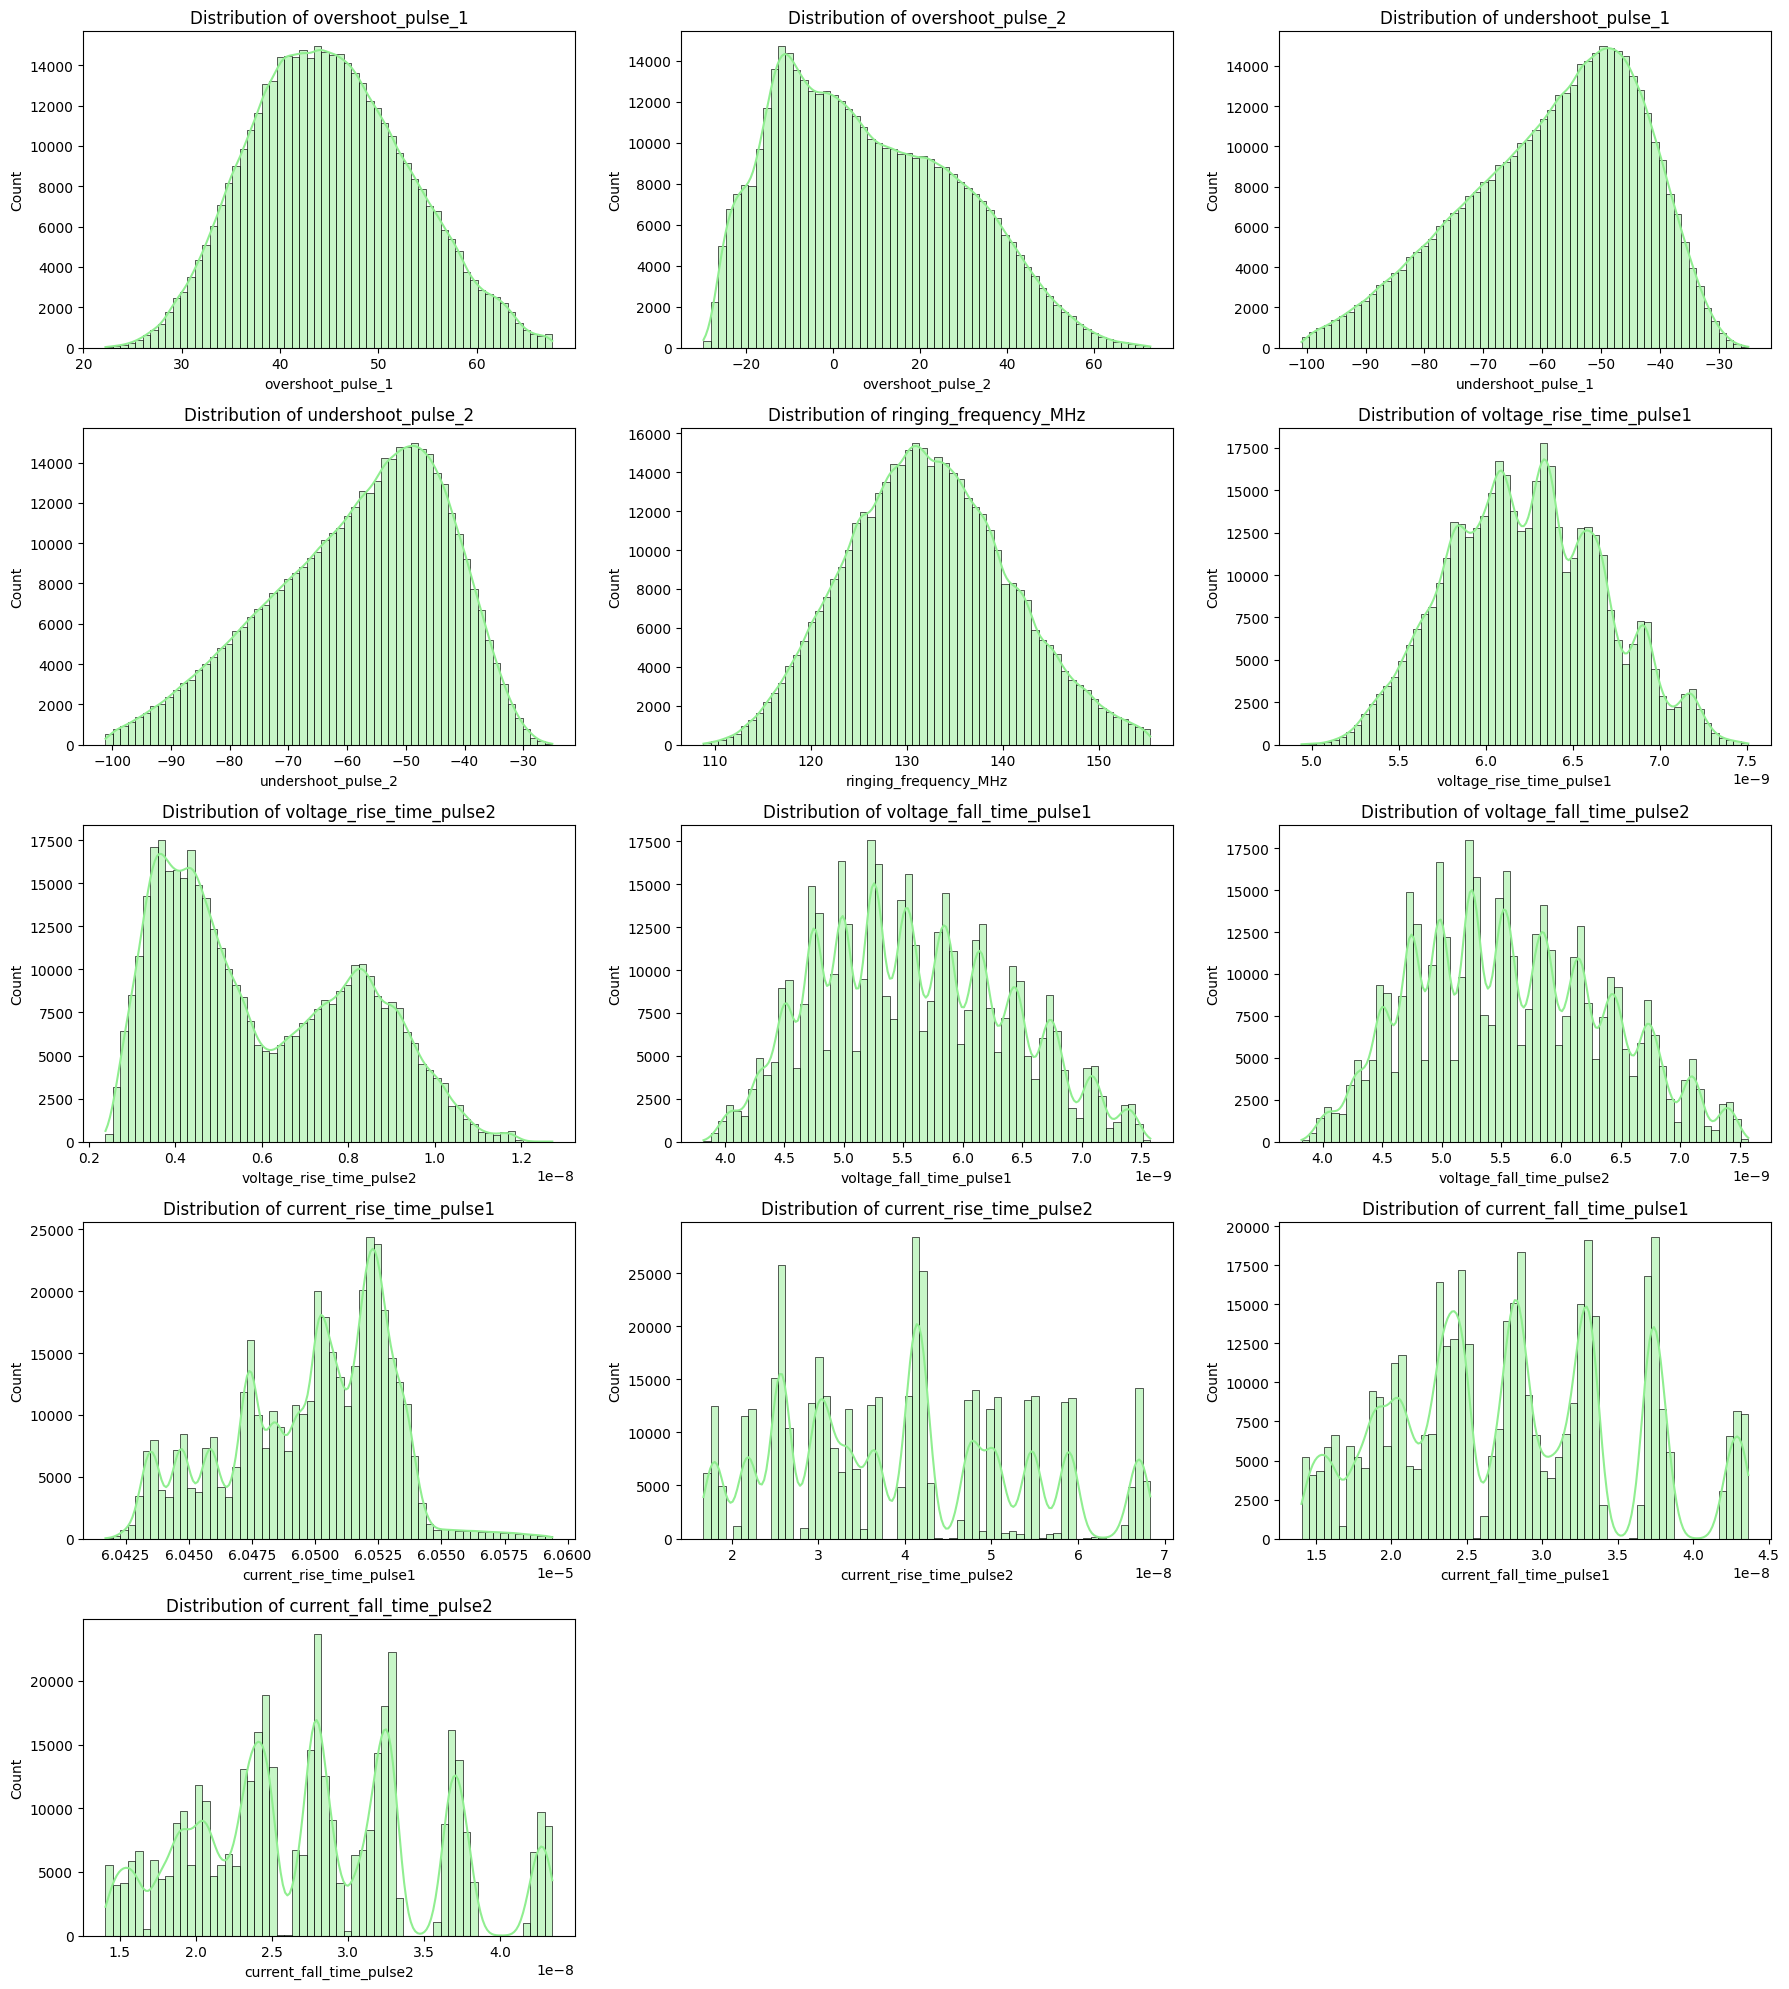

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the EMI target columns for nulls and negative 
target_columns = [
    'overshoot_pulse_1', 'overshoot_pulse_2',
    'undershoot_pulse_1', 'undershoot_pulse_2',
    'ringing_frequency_MHz',
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]

# negative values (should not exist for rise/fall, freq, overshoot)
null_counts = df_filtered[target_columns].isnull().sum()
print("Null Value Count Per Target Column:")
print(null_counts[null_counts > 0])

rise_fall_columns = [
    'voltage_rise_time_pulse1', 'voltage_rise_time_pulse2',
    'voltage_fall_time_pulse1', 'voltage_fall_time_pulse2',
    'current_rise_time_pulse1', 'current_rise_time_pulse2',
    'current_fall_time_pulse1', 'current_fall_time_pulse2',
]
check_negative = df_filtered[rise_fall_columns].lt(0)
negative_counts = check_negative.sum()
print("\nNegative Value Count (Rise/Fall Columns Only):")
print(negative_counts[negative_counts > 0])  

#IQR-based outliers
outlier_stats = {}
for col in target_columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_filtered[(df_filtered[col] < lower) | (df_filtered[col] > upper)]
    
    outlier_stats[col] = {
        'min': df_filtered[col].min(),
        'max': df_filtered[col].max(),
        'iqr_lower': lower,
        'iqr_upper': upper,
        'outliers': len(outliers),
        'range': df_filtered[col].max() - df_filtered[col].min()
    }

summary_df = pd.DataFrame(outlier_stats).T
print("\nFinal IQR-based Outlier Summary:")
display(summary_df)

# Plot final cleaned EMI output distributions 
n_cols = 3
n_rows = (len(target_columns) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(target_columns):
    sns.histplot(df_filtered[col], bins=60, kde=True, ax=axs[i], color='lightgreen')
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")
for j in range(len(target_columns), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


In [21]:
df_filtered.to_csv('mosfets_step3_final_cleaned/C2M0280120D_cleaned.csv', index=False)
print("Saved to: mosfets_step3_final_cleaned/C2M0280120D_cleaned.csv")


Saved to: mosfets_step3_final_cleaned/C2M0280120D_cleaned.csv
